In [1]:
# Import all Python modules required for notebook
import os
import sleap
import tensorflow as tf

models_folder = "../models"

In [2]:
# The definition of a model folder used by SLEAP is any folder that contains a 'best_model.h5'
# and a 'training_config.json' file, as per the SLEAP documentation
# https://sleap.ai/api/sleap.nn.inference.html#sleap.nn.inference.load_model
def get_models(path):
    has_weights = False
    has_config = False
    
    for entry in os.scandir(path):
        if entry.name == 'best_model.h5':
            has_weights = True
        elif entry.name == 'training_config.json':
            has_config = True
        
    if has_weights and has_config:
        return [os.path.abspath(path)]
    else:
        model_paths = []
        
        for entry in os.scandir(path):
            if entry.is_dir():
                model_paths.extend(get_models(entry.path))
        
        return model_paths 

display(get_models(models_folder))

['D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\filter_16-stride_16.240425_031454.centered_instance',
 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\filter_16-stride_16.240425_031454.centroid',
 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\filter_16-stride_32.240425_031454.centered_instance',
 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\filter_16-stride_32.240425_031454.centroid',
 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\filter_16-stride_8.240425_031454.centered_instance',
 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\filter_16-stride_8.240425_031454.centroid',
 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\filter_24-stride_16.240425_031454.centered_instance',
 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\filter_24-stride_16.240425_031454.centroid',
 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\filter_24-stride_32.240425_031454.centered_instance',
 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\fi

In [3]:
model = 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\myee1\\half_size.240416_202503.multi_instance'

# Select a centroid model, a centred instance model, and a multi-instance model from the models above
# and add the paths to the variables below
centroid_model = 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\filter_32-stride_32.240425_031454.centroid'
centred_instance_model = 'D:\\Documents\\COMP3850-Group23-Ant-posture\\models\\filter_32-stride_32.240425_031454.centered_instance'

# Select a video to use for inference and add the path here
video = 'D:\\Downloads\\Ant videos\\rescaled\\Col218_cropped.mp4'

In [4]:
video_data = sleap.load_video(video)
imgs = video_data[14000:14010]

In [5]:
top_down = sleap.load_model([centroid_model, centred_instance_model])

In [26]:
# Getting a JIT compilation error when using GPU inference, using CPU instead
with tf.device('/CPU:0'):
    top_down_pr = top_down.predict(imgs)

Output()

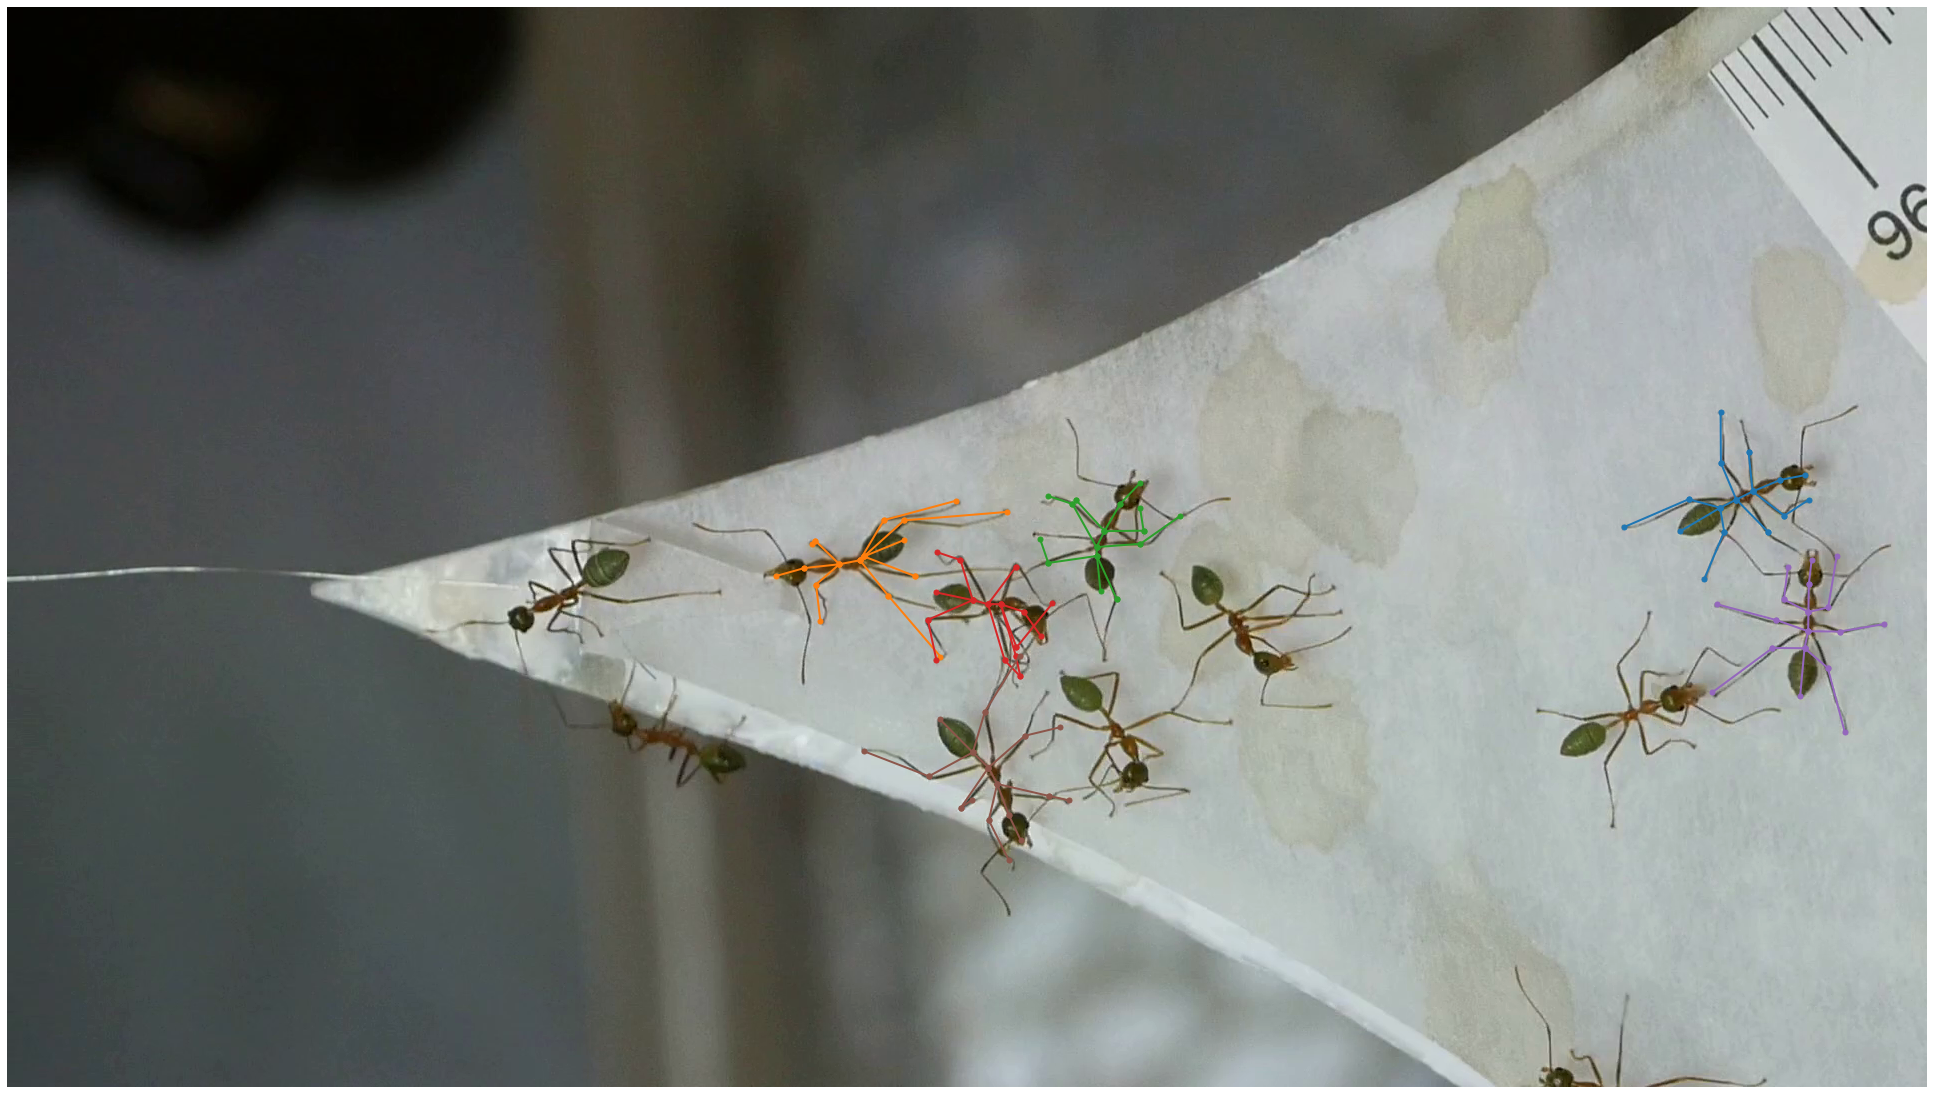

In [23]:
top_down_pr.labeled_frames[0].plot_predicted()

# Data export

In [44]:
top_down_pr.labeled_frames[0].instances[0].skeleton.nodes

[Node(name='Head', weight=1.0),
 Node(name='Neck', weight=1.0),
 Node(name='UpperThorax', weight=1.0),
 Node(name='LowerThorax', weight=1.0),
 Node(name='Petiole', weight=1.0),
 Node(name='Abdomen', weight=1.0),
 Node(name='LForeLeg', weight=1.0),
 Node(name='LForeFoot', weight=1.0),
 Node(name='RForeLeg', weight=1.0),
 Node(name='RForeFoot', weight=1.0),
 Node(name='LMidLeg', weight=1.0),
 Node(name='LMidFoot', weight=1.0),
 Node(name='RMidLeg', weight=1.0),
 Node(name='RMidFoot', weight=1.0),
 Node(name='LHindLeg', weight=1.0),
 Node(name='LHindFoot', weight=1.0),
 Node(name='RHindLeg', weight=1.0),
 Node(name='RHindFoot', weight=1.0)]

In [46]:
output_path = "D:\\Documents\\COMP3850-Group23-Ant-posture\\postures.csv"

In [64]:
top_down_pr.skeleton.nodes[0].name

Node(name='Head', weight=1.0)

In [73]:
top_down_pr.labeled_frames[0].instances[0].points[0]

PredictedPoint(x=1797.173095703125, y=467.8652038574219, visible=True, complete=False, score=0.9303747415542603)

In [77]:
with open(output_path, 'w') as file:
    file.write('video_path,video_width,video_height,frame_idx,instance_idx,part_name,predicted,x_pos,y_pos\n')

    for frame in top_down_pr.labeled_frames:
        for instance_idx, instance in enumerate(frame.instances):
            for point_idx, point in enumerate(instance.points):
                file.write(f'{video},{video_data.width},{video_data.height},{frame.frame_idx+14000},{instance_idx},{top_down_pr.skeleton.nodes[point_idx].name},True,{point.x},{point.y}\n')